In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Question 1

In [2]:
def likelihood(x, hypothesis):
    prob = 1
    for i in x:
        if i in hypothesis:
            prob *= 1/len(hypothesis)
        else:
            prob = 0
    return prob

H1(even numbers): Likelihood each hypothesis assigns to each data point in it is 1/50 and likelihood each hypothesis assigns to each data point NOT in it is 0 <br>
H2(odd numbers): Likelihood each hypothesis assigns to each data point in it is 1/50 and likelihood each hypothesis assigns to each data point NOT in it is 0 <br>
H3(square numbers): Likelihood each hypothesis assigns to each data point in it is 1/10 and likelihood each hypothesis assigns to each data point NOT in it is 0<br>
H4(prime numbers): Likelihood each hypothesis assigns to each data point in it is 1/25 and likelihood each hypothesis assigns to each data point NOT in it is 0<br> 
H5(multiples of 5): Likelihood each hypothesis assigns to each data point in it is 1/20 and likelihood each hypothesis assigns to each data point NOT in it is 0<br> 
H6(multiples of 10): Likelihood each hypothesis assigns to each data point in it is 1/10 and likelihood each hypothesis assigns to each data point NOT in it is 0<br> 
H7(All numbers-[1, 2, 3, ... 100]): Likelihood each hypothesis assigns to each data point in it is 1/100 and likelihood each hypothesis assigns to each data point NOT in it is 0<br>

General idea: Likelihood each hypothesis assigns to each data point in it is 1/len(H) and likelihood each hypothesis assigns to each datapoint not in it is 0.

# Question 2

In [3]:
def helper(num):
    primes = []
    for x in range(2, num + 1): 
        isPrime = True
        for num in range(2, int(x ** 0.5) + 1): 
            if x % num == 0:
                isPrime = False
                break
        if isPrime:
            primes.append(x)
    return primes

In [4]:
h1=[i for i in range(1, 101) if i%2 ==0]
h2=[i for i in range(1, 101) if i%2 ==1]
h3=[i for i in range(1, 101) if int(np.sqrt(i))==np.sqrt(i)]
h4=helper(100)
h5=[i for i in range(1, 101) if i%5 ==0] 
h6=[i for i in range(1, 101) if i%10 ==0]
h7= [i for i in range(1, 101)]
hypothesis=[h1,h2,h3,h4,h5,h6, h7]

In [5]:
prior = 1/7
data1=[]
data2=[50]
data3=[53]
data4=[50,53]
data5=[16]
data6=[10,20]
data7=[2,4,8]
data8=[2,4,8,10]

In [6]:
def hypo_d(x,h):
    like = likelihood(x,h)
    constant = sum([likelihood(x,h) for h in hypothesis]) * (1/7)
    if constant == 0:
        return 0
    return (1/7*like)/constant
def n_data(x,hs):
    res=[]
    for i in range(1,101): 
        prob = 0
        for h in hs:
            if i in h:
                prob += 1/7*hypo_d(x,h)
        res.append(prob)
    return res

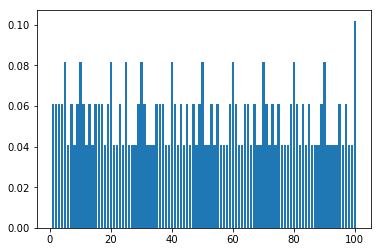

In [26]:
res=n_data(data1,hypothesis)
plt.bar(list(range(1,101)),res)
plt.show()

There's no data in the dataset so plot is showing probability of the numbers 1 to 100 are in the concept

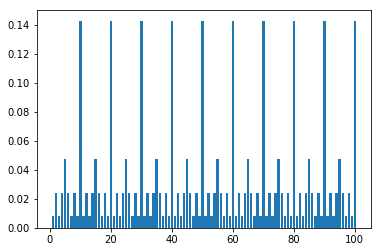

In [8]:
res=n_data(data2, hypothesis)
plt.bar(list(range(1,101)), res)
plt.show()

The dataset [50] satisfied hypothesis 1,5,6 so the plot has high values at multiples of 5, 10, 20.

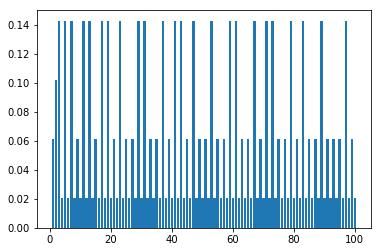

In [9]:
res=n_data(data3, hypothesis)
plt.bar(list(range(1,101)), res)
plt.show()

Data [53] satisfies hypothesis 2,4 because it is prime and odd

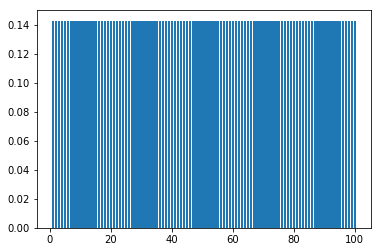

In [10]:
res=n_data(data4, hypothesis)
plt.bar(list(range(1,101)), res)
plt.show()

Data [50,53] satisfies hypothesis 7 because that is the only way these 2 numbers can be together.

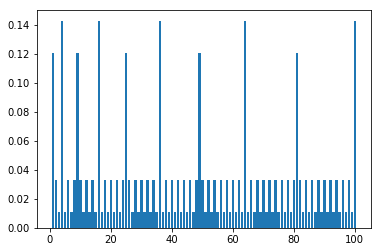

In [11]:
res=n_data(data5, hypothesis)
plt.bar(list(range(1,101)), res)
plt.show()

Data [16] satisfies hypothesis 1,3 because it is even and square. So by intuition sqaure numbers are the right answers

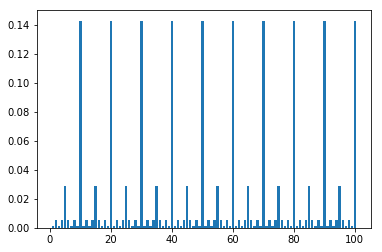

In [12]:
res=n_data(data6, hypothesis)
plt.bar(list(range(1,101)), res)
plt.show()

Data [10,20] satisfies hypothesis 1,5,6 because they are multiples of 5, 10 so by intuition the numbers that go by 10s are the right answers.

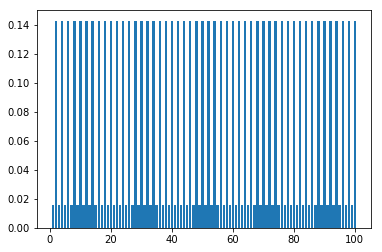

In [13]:
res=n_data(data7, hypothesis)
plt.bar(list(range(1,101)), res)
plt.show()

Data [2,4,8] satisfies hypothesis 1 so by intution the right answers are even numbers.

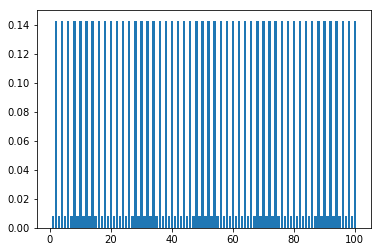

In [14]:
res=n_data(data8, hypothesis)
plt.bar(list(range(1,101)), res)
plt.show()

Data [2,4,8,10] satisfies hypothesis 1 do by intution the right answers are even numbers.

# Question 3

In [73]:
intervals=[]
for i in range(1,101):
    for j in range(i+1,101):
        intervals.append(list(range(i,j)))

In [76]:
hypothesis = hypothesis+intervals
def hypo_d(x, h):
    prior = 1/8
    if h in hypothesis[:6]:
        like = likelihood(x,h)
    else:
        like = likelihood(x,h)*1/4950
    constant = sum([likelihood(x,h) for h in hypothesis[6:]])*prior+sum([likelihood(x,h) for h in hypothesis[6:]])*prior*1/4950
    if constant == 0:
        return 0
    return prior*like/constant

def n_data(x,hs):
    res=[]
    for i in range(1,101): 
        prob = 0
        for h in hs:
            if i in h:
                prob += 1/8*hypo_d(x,h)
        res.append(prob)
    return res

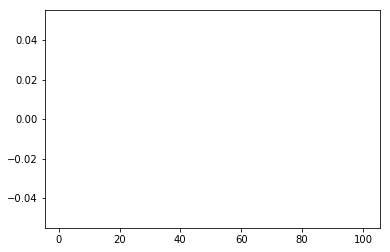

In [17]:
res=n_data(data1,hypothesis)
plt.bar(list(range(1,101)),res)   
plt.show()

There's no data in the dataset so all of the numbers 1...100 are not in the concept

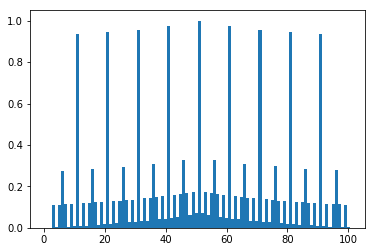

In [18]:
res=n_data(data2,hypothesis)
plt.bar(list(range(1,101)),res)   
plt.show()

Data [50] satisfies the modified hypothesis better and shows that the right answers are multiple of 5 so number closer to 50 is more likely to be in the concept.

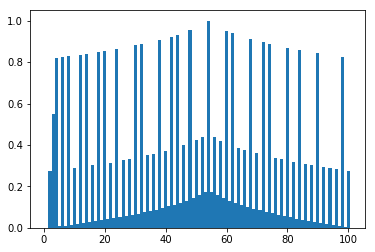

In [19]:
res=n_data(data3,hypothesis)
plt.bar(list(range(1,101)),res)   
plt.show()

Data [53] satisfies hypothesis 4 but don't think it better matches my intuition.

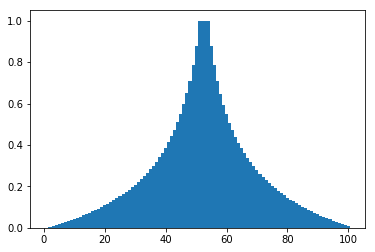

In [20]:
res=n_data(data4,hypothesis)
plt.bar(list(range(1,101)),res)   
plt.show()

Data [50, 53] satisifes hypothesis 7 as the intution is that the range is pretty big and contains large amount of numbers.

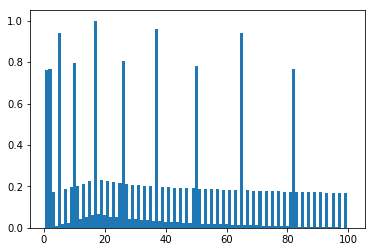

In [21]:
res=n_data(data5,hypothesis)
plt.bar(list(range(1,101)),res)   
plt.show()

Data [16] satisfies hypothesis 3 for square numbers and the modified hypothesis has little improvement so by intuiton square numbers are right answers.

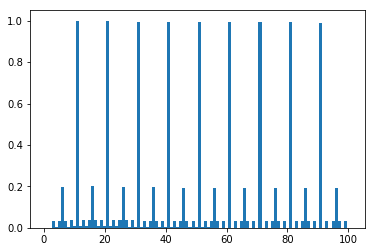

In [22]:
res=n_data(data6,hypothesis)
plt.bar(list(range(1,101)),res)   
plt.show()

Data [10,20] satisfies hypothesis 1,5,6 and the modified hypthosis is similar to the previous version. By intuition, the right answers are multiples of ten.

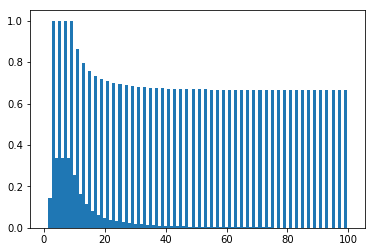

In [23]:
res=n_data(data7,hypothesis)
plt.bar(list(range(1,101)),res)   
plt.show()

Data [2,4,8] still satisfies hypothesis 1 but the modified hypothesis better matches my intuiton as the right answers are smaller even numbers.

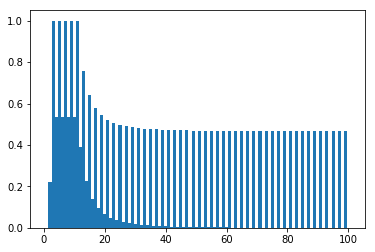

In [24]:
res=n_data(data8,hypothesis)
plt.bar(list(range(1,101)),res)   
plt.show()

Data [2,4,8,10] still satisfies hypothesis 1 but the modified hypothesis better matches my intuiton as the right answers are smaller even numbers.